In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def getEllipsRegret(T, D, theta):
    A = np.zeros((D, D), dtype=np.double)  #ellipsoid matrix
    a = np.zeros(D, dtype=np.double)  #center of ellipsoid
    regret = 0.
    for i in range(D):
        A[i, i] = D
    for i in range(T):
        x = np.random.rand(D)
        value = (x * theta).sum()
        
        b = A.dot(x) / np.sqrt((x * A.dot(x)).sum())
        
        if (value < 0):
            print("Error")
        
        if (2 * np.sqrt((x * A.dot(x)).sum()) < 1 / T):
            regret += value - (x * (a - b)).sum()
            continue
        elif (value <= x.dot(a)):
            a -= b / (D + 1)
            regret += value
            #print(T, " rejection")
        elif (value > x.dot(a)):
            a += b / (D + 1)
            regret += value - x.dot(a)
            #print(T, " acception")
        
        A = D**2 / (D**2 - 1) * (A - 2 / (D + 1) * b * np.reshape(b, (-1, 1)))
        
        
    return regret

Progress:  100 Regret:  114.40560485776302
Progress:  200 Regret:  239.55316993280857
Progress:  300 Regret:  361.2666481106258
Progress:  400 Regret:  469.4575680435645
Progress:  500 Regret:  603.2675731965709
Progress:  600 Regret:  726.4810457413165
Progress:  700 Regret:  850.5048224108849
Progress:  800 Regret:  980.448446131353
Progress:  900 Regret:  1102.80898222004
Progress:  1000 Regret:  1218.647474199293
Progress:  1100 Regret:  1314.660387346741
Progress:  1200 Regret:  1476.8730498196824
Progress:  1300 Regret:  1595.8843874311406
Progress:  1400 Regret:  1713.5377226708827
Progress:  1500 Regret:  1861.5761651734706
Progress:  1600 Regret:  1969.0888266287543
Progress:  1700 Regret:  2079.1904829954033
Progress:  1800 Regret:  2212.8158174532155


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


Progress:  1900 Regret:  nan
Progress:  2000 Regret:  2291.0710558485034
Progress:  2100 Regret:  nan
Progress:  2200 Regret:  nan
Progress:  2300 Regret:  2280.8438511616864
Progress:  2400 Regret:  2258.832300124805
Progress:  2500 Regret:  nan
Progress:  2600 Regret:  nan
Progress:  2700 Regret:  2258.7291941103545
Progress:  2800 Regret:  2253.3955808819574
Progress:  2900 Regret:  nan
Progress:  3000 Regret:  2303.9260031322415
Progress:  3100 Regret:  2315.920484455108
Progress:  3200 Regret:  2281.4223911863687
Progress:  3300 Regret:  nan
Progress:  3400 Regret:  2263.6766542180653
Progress:  3500 Regret:  2283.351000273366
Progress:  3600 Regret:  nan
Progress:  3700 Regret:  2284.999938895604
Progress:  3800 Regret:  nan
Progress:  3900 Regret:  nan
Progress:  4000 Regret:  2225.720818280965
Progress:  4100 Regret:  nan
Progress:  4200 Regret:  nan
Progress:  4300 Regret:  2247.9256379318485
Progress:  4400 Regret:  nan
Progress:  4500 Regret:  2287.3349350648978
Progress:  4

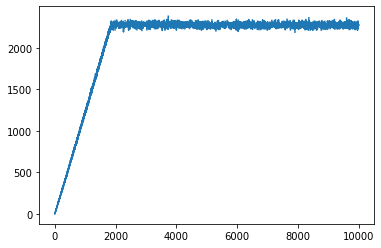

In [3]:
T, D = 10000, 10
theta = np.random.rand(D)
regret = np.zeros(T)

for i in range(1, T):
    regret[i] = getEllipsRegret(i, D, theta)
    if (i % 100 == 0):
        print("Progress: ", i, "Regret: ", regret[i])
    
plt.plot(regret)

In [79]:
np.savetxt("regret_T=10000.csv", regret, delimiter=",")